# ( ADD EXPLANATION OF PROJECT AND VARIABLE NAMES ETC)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
import plotly.graph_objs as go
from plotly.plotly import iplot


In [3]:
train = pd.read_csv("train_values.csv")
y = pd.read_csv("train_labels.csv")
data = pd.merge(train, y)

In [4]:
list(train.columns)

['patient_id',
 'slope_of_peak_exercise_st_segment',
 'thal',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina']

Expect to see if there is a negative relationship between age and the maximum heart rate achieved. 

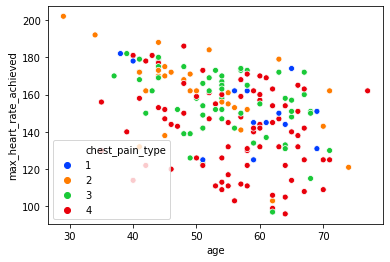

In [5]:
palette = sns.color_palette("bright", 4)
sns.scatterplot(x = 'age', y = 'max_heart_rate_achieved', 
                data = train, hue = train['chest_pain_type'], palette = palette);

As expected, there is a negative relationship between age and max heart rate achieved but they dont seem to correlate with chest pain type. Chest pain types seem to be relatively uniform. 

chest_pain_type
1    57.846154
2    50.821429
3    54.315789
4    56.036585
Name: age, dtype: float64


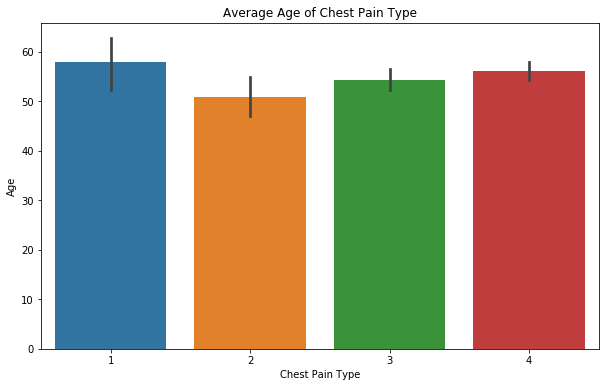

In [6]:
plt.figure(figsize = (10,6))
print(train.groupby('chest_pain_type')['age'].mean())
sns.barplot(x = train.chest_pain_type, y = train.age)
plt.title("Average Age of Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Age");

F_onewayResult(statistic=2.767207747398542, pvalue=0.04330865490718395)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.767
Date:                Wed, 18 Sep 2019   Prob (F-statistic):             0.0433
Time:                        11:27:01   Log-Likelihood:                -652.83
No. Observations:                 180   AIC:                             1314.
Df Residuals:                     176   BIC:                             1326.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  57.8462      2.551     22.672      0.000      52.811      62.882
C(chest_pain_type)[T.2]    -7.0247      3.087     -2.275      0.024     -13.118      -0.931
C(chest_pain_type)[T.3]    -3.5304      2.828     -1.249      0.213      -9.111       2.050
C(chest_pain_type)[T.4]    -1.8096      2.746     -0.659      0.511      -7.229       3.610
==============================================================================
Omnibus:                        1.571   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.543
Skew:                          -0.141   Prob(JB):                        0.462
Kurtosis:                       2.645   Cond. No.                         8.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

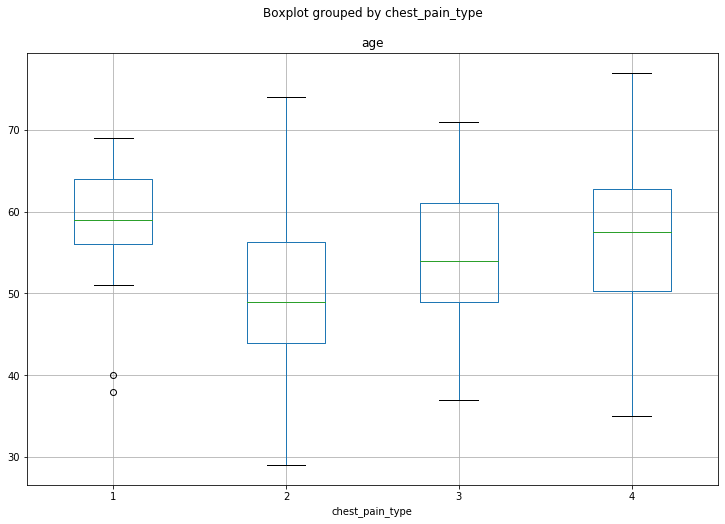

In [7]:
train.boxplot('age', by = 'chest_pain_type', figsize = (12,8))
stats.f_oneway(train['age'][train['chest_pain_type'] == 1],
                     train['age'][train['chest_pain_type'] == 2],
                     train['age'][train['chest_pain_type'] == 3],
                     train['age'][train['chest_pain_type'] == 4])

anova_test = smf.ols('age ~ C(chest_pain_type)', data = train).fit()
anova_test.summary()


The bar plot comparing the average ages per each chest pain type furthers my suspicions. 
There does not seem to be a significant difference in average ages between the types of chest pain. 
The boxplots and an Analysis of Variance test seem to suggest otherwise. 
The boxplot shows there is a difference in variance between the types of pain but their average is similar.
The ANOVA test rejects the null hypothesis of there being no difference between groups with a p value of 0.0433,
suggesting there is a difference in ages between the chest pains, but the effect size implies the 
difference is negligible.

In [8]:
#cpt1 = train[train.chest_pain_type == 1]
#cpt2 = train[train.chest_pain_type == 2]
#cpt3 = train[train.chest_pain_type == 3]
#cpt4 = train[train.chest_pain_type == 4]

#trace1 = go.Scatter(
#                    x = cpt1.age, y = cpt1.max_heart_rate_achieved,
#                    mode = 'markers', name = 'Chest Pain Type 1', 
#                    marker = dict(color = 'rgba(255, 0, 0, 0.8)') )
    
#trace2 = go.Scatter(
#                    x = cpt2.age, y = cpt2.max_heart_rate_achieved,
#                    mode = 'markers', name = 'Chest Pain Type 2', 
#                    marker = dict(color = 'rgba(0, 200, 0, 0.8)') )
    
#trace3 = go.Scatter(
#                    x = cpt3.age, y = cpt3.max_heart_rate_achieved,
#                    mode = 'markers', name = 'Chest Pain Type 3', 
#                    marker = dict(color = 'rgba(0, 0, 255, 0.8)') )
    
#trace4 = go.Scatter(
#                    x = cpt4.age, y = cpt4.max_heart_rate_achieved,
#                    mode = 'markers', name = 'Chest Pain Type 4', 
#                    marker = dict(color = 'rgba(0, 0, 0, 0.8)') )
    
#data = [trace1, trace2, trace3, trace4]
    
#layout = dict(title = 'Age vs Max HR Achieved with Chest Pain Types',
#                 xaxis = dict(title = "Age", ticklen = 5, zeroline = False),
#                 yaxis = dict(title = "Max HR Achieved", ticklen = 5, zeroline = False))

#fig = dict(data = data, layout = layout)
#plotly.offline.plot(fig, filename = "Age_vs_MaxHR.html")

## Analysis of the Response Variable (Presence of Heart Disease)

### Heart Disease Presence vs Age

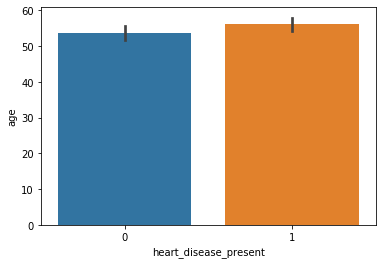

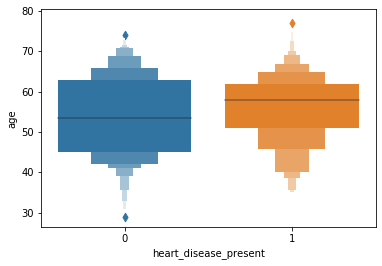

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     3.469
Date:                Wed, 18 Sep 2019   Prob (F-statistic):             0.0642
Time:                        11:27:02   Log-Likelihood:                -655.24
No. Observations:                 180   AIC:                             1314.
Df Residuals:                     178   BIC:                             1321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          53.6600      0.927     57.879      0.000      51.830      55.490
C(y.heart_disease_present)[T.1]     2.5900      1.391      1.862      0.064      -0.154       5.334
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.330
Skew:                          -0.153   Prob(JB):                        0.312
Kurtosis:                       2.534   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

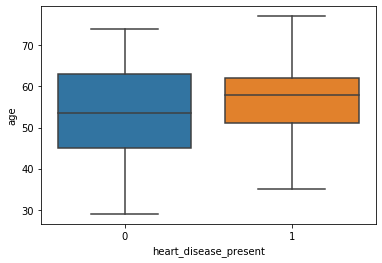

In [9]:
sns.barplot(x = y.heart_disease_present, y = train.age)
plt.show()
sns.boxenplot(x = y.heart_disease_present, y = train.age)
plt.show()
sns.boxplot(x = y.heart_disease_present, y = train.age)
anova_test = smf.ols('age ~ C(y.heart_disease_present)', data = train).fit()
anova_test.summary()

There does not seem to be any major difference in ages between the age ranges of the people who did have 
some form of heat disease versus the people who did not. The boxplot shows the variability of the people
who did have it was less, which is reasonable. One would expect heart disease to occur more often in the 
older population than in the younger group. The bargraph also hints at this since it shows the mean 
patients having heart disease is slightly higher. An analysis of variance test between the two groups suggests there is no statistical difference between the ages of the two groups.  

### Heart Disease Presence vs Sex

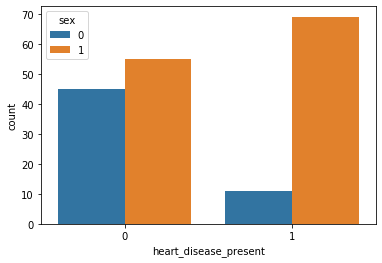

In [10]:
df = pd.merge(train, y)
df.groupby("heart_disease_present")['sex'].value_counts()

sns.countplot(x = "heart_disease_present", data = df, hue = "sex") 

anova_test = smf.ols('heart_disease_present ~ C(sex)', data = df).fit()
anova_test.summary()
df['sex'].value_counts();

There does seem to be a relationship between the sex of a patient and whether there is heart disease present. Males tend to be at higher risk of developing some form of heart disease. Since there are significantly more males than females in the study, it is better to look at their corresponding proportions. 

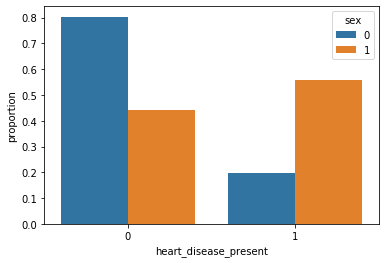

In [11]:
# create a table summarizing the counts in sexes vs heart disease
hd_sex = df[['sex', 'heart_disease_present']]
hd_vs_sex = pd.crosstab(hd_sex.sex, hd_sex.heart_disease_present)

# divided the values by their respective sex total to find the proportions
hd_vs_sex_norm = pd.crosstab(hd_sex.sex, hd_sex.heart_disease_present, 
                       normalize = 'index')
hd_vs_sex_norm


# spread out data to plot
hd_vs_sex_norm = hd_vs_sex_norm.reset_index()
hd_vs_sex_norm_spread = pd.melt(hd_vs_sex_norm, id_vars = 'sex', var_name = 'heart_disease_present', value_name = 'proportion')

sns.barplot(x = "heart_disease_present", y = 'proportion', data = hd_vs_sex_norm_spread, hue = 'sex') ;


As suggested, males on average are more likely to develop heart disease, while females are significantly less likely. 80% of women do not have a form of disease while 56% of men do. I wonder why there is a large discrepancy, might be worth investigating.

###### Investigating the cause for Sex's effect on Heart Disease
(pending)

###  Heart Disease Presence vs Maximum Heart Rate Achieved

Even though the result seems trivial, I want to see if there is a difference in maximum heart rates achieched between the patiens who did and did not have heart disease. I expect to find that people with heart disease will not be able to acheive as high of a heart rate as people with healthy hearts since theirs is weakened. 

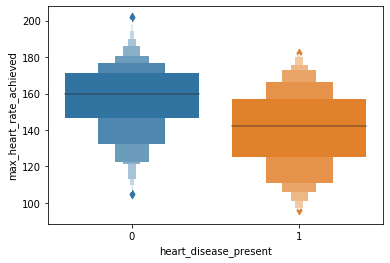

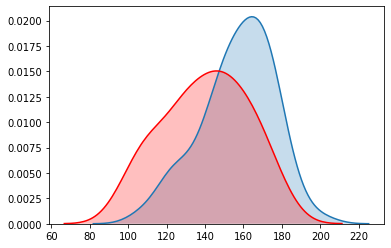

In [12]:
#boxplot of max HR grouped by prescence of heart disease
sns.boxenplot(x = data.heart_disease_present, y = data.max_heart_rate_achieved)
plt.show()

#kernel density estimate plot
sns.kdeplot(data.max_heart_rate_achieved[data.heart_disease_present == 0], shade = True, legend = False)
sns.kdeplot(data.max_heart_rate_achieved[data.heart_disease_present == 1], shade = True, color = "r", legend = False)
plt.show()

#ANOVA test to determine difference
HR_vs_HD_test = smf.ols("heart_disease_present ~ max_heart_rate_achieved", data = data).fit()
HR_vs_HD_test.summary();

My hypothesis seems to be correct. Patients with heart disease tend to achieve a lower maximum heart rate. The box plot and the kernel estimate plot show the distribution for the people with heart disease to be lower than the ones without. The ANOVA test confirms the visuals. There is a difference between the two groups, rejecting the hypthesis of the groups being similar with a p-value of $2.08 \times 10^{-7}$. Nothing particularly suprising here. 

### Heart Disease Presence vs Type of Chest Pain 

If the heart is weakened by some form of heart disease, I would expect there to be some for of discomfort or pain in the chest. Thus, I expect more individuals with heart disease to have more serious forms of chest pains. 

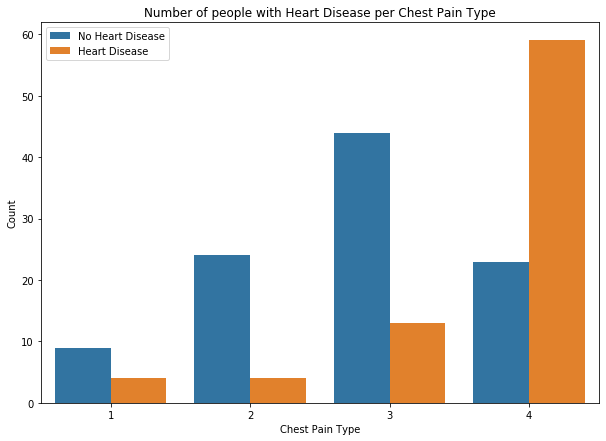

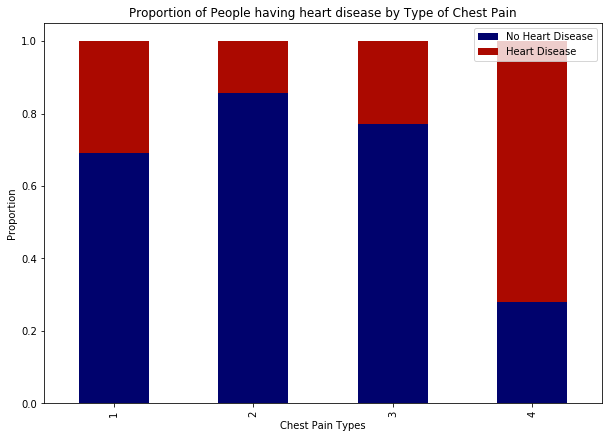

In [14]:
#bar plot displaying the counts for each chest pain type grouped by whther they had heart disease 
fig, ax = plt.subplots(figsize=(10,7))  

sns.countplot(x = data.chest_pain_type, hue = data.heart_disease_present)
plt.title("Number of people with Heart Disease per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
ax.legend(labels = ["No Heart Disease", "Heart Disease"])
plt.show()


#Prepare data by normalizing before creating stacked barplot
pivot_df = pd.crosstab(data.chest_pain_type, data.heart_disease_present, normalize = "index")
pivot_df = pivot_df.reset_index()
pivot_df = pd.melt(pivot_df, id_vars = "chest_pain_type", var_name= "heart_disease_present", value_name = "proportion")



#stacked bar plot displaying the proportion of people having heart disease per chest pain type
fig, ax = plt.subplots(figsize=(10,7))  

hd = pivot_df["heart_disease_present"].drop_duplicates()
margin_bottom = np.zeros(len(pivot_df.chest_pain_type.drop_duplicates()))
colors = ["#00026d", "#ab0900"]

for i, hd_prsnt in enumerate(hd):
    proportion = list(pivot_df[pivot_df["heart_disease_present"] == hd_prsnt].loc[:,"proportion"])
    pivot_df[pivot_df["heart_disease_present"] == hd_prsnt].plot.bar(x = "chest_pain_type", y = "proportion",
                                                                    ax = ax, stacked = True, color = colors[i],
                                                                    bottom = margin_bottom, label = hd_prsnt)
    margin_bottom += proportion
    
mylabels = ["No Heart Disease", "Heart Disease"]
ax.legend(labels = mylabels)
plt.xlabel("Chest Pain Types")
plt.ylabel("Proportion")
plt.title("Proportion of People having heart disease by Type of Chest Pain")
plt.show();

According to the data, my hypothesis was incorrect, extremely incorrect at that. Apparently, more people with no heart disease tend to have some form of chest pain (types 1, 2, and 3). Meanwhile, most of the people with no chest pain (type 4) tend to have heart disease. This is wildly against my expectations. Requires further investigation. There may be some interacting term that explains the discrepancy. 

###### Investigating why Heart disease is not associating with chest pain
(pending)

### Heart Disease Presence vs Exercise Induced Angina